In [117]:
# !wget 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [239]:
df = pd.read_csv('AB_NYC_2019.csv')

In [120]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


(0.0, 1500.0)

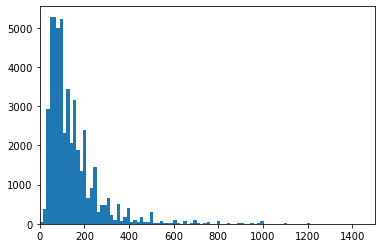

In [121]:
fig, ax = plt.subplots()
ax.hist(df.price[df.price < 1500], bins = 100)
ax.set_xlim(0, 1500)

In [240]:
cols = ['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

In [241]:
df = df[cols]

### Question 1

In [124]:
df.isna().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Question 2

In [125]:
df.minimum_nights.median()

3.0

In [126]:
n = len(df)

In [127]:
n

48895

In [128]:
n_val = n_test = int(0.2 * n)

In [129]:
n_train = n - n_val - n_test

In [130]:
n_train

29337

In [131]:
idx = np.arange(n)

In [132]:
np.random.seed(42)

In [133]:
np.random.shuffle(idx)

In [134]:
df_train = df.iloc[idx[:n_train]]

In [135]:
df_val = df.iloc[idx[n_train:n_train + n_val]]

In [136]:
df_test = df.iloc[idx[n_train + n_val:]]

In [137]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [138]:
df_train = df_train.reset_index(drop = True)

In [139]:
df_val = df_val.reset_index(drop = True)

In [140]:
df_test = df_test.reset_index(drop = True)

In [141]:
y_train = np.log1p(df_train.price.values)

In [142]:
y_val = np.log1p(df_val.price.values)

In [143]:
y_test = np.log1p(df_test.price.values)

In [144]:
del df_train['price']

In [145]:
del df_val['price']

In [146]:
del df_test['price']

### Question 3

In [147]:
df.isna().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [181]:
def train_linear_regression(X, y):
    X = X.copy()
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

Filling with 0:

In [182]:
def prepare_X(df):
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X

In [183]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [193]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_preds = w0 + X_val.dot(w)
round(rmse(y_preds, y_val), 2)

0.64

Filling with mean:

In [189]:
def prepare_X(df):
    df = df.copy()
    df.reviews_per_month = df.reviews_per_month.fillna(df_train.reviews_per_month.mean())
    X = df.values
    return X

In [224]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [192]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_preds = w0 + X_val.dot(w)
round(rmse(y_preds, y_val), 2)

0.64

### Question 4

In [245]:
def prepare_X(df):
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X

In [205]:
def train_linear_regression(X, y, r = 0.01):
    X = X.copy()
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [211]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train, r)

    X_val = prepare_X(df_val)
    y_preds = w0 + X_val.dot(w)
    print(r, w0, round(rmse(y_preds, y_val), 2))

0 -419.91265872315813 0.64
1e-06 -419.8627156612891 0.64
0.0001 -414.97649241546526 0.64
0.001 -375.2736526945097 0.64
0.01 -191.7838405121791 0.66
0.1 -32.56256055279646 0.68
1 -3.499216837025976 0.68
5 -0.7033623164576596 0.68
10 -0.35127676049422046 0.68


### Question 5

In [266]:
df = pd.read_csv('AB_NYC_2019.csv')
df = df[cols]
n = len(df)
n_val = n_test = int(0.2 * n)
n_train = n - n_val - n_test

def prepare_X(df):
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

def train_linear_regression(X, y, r = 0):
    X = X.copy()
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

idx = np.arange(n)
rmses = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]
    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    del df_train['price']
    del df_val['price']
    del df_test['price']
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train, r=0)
    X_val = prepare_X(df_val)
    y_preds = w0 + X_val.dot(w)
    error = rmse(y_preds, y_val)
    print(seed, w0, round(error, 2))
    rmses.append(error)


0 -427.62844663085383 0.65
1 -421.09069991334474 0.65
2 -424.53875160546545 0.64
3 -415.14467615968096 0.65
4 -423.872894499059 0.64
5 -432.16428192972114 0.65
6 -413.65080109062546 0.64
7 -422.1735196069566 0.64
8 -423.8979539149593 0.65
9 -425.93368014110996 0.64


In [267]:
rmses

[0.6549779960970726,
 0.6490107391897045,
 0.6448482967629039,
 0.6535290113360999,
 0.6405374976383811,
 0.6465479248062896,
 0.6403505009502948,
 0.6438490540742557,
 0.6492927028952037,
 0.6407028713539275]

In [268]:
round(np.std(rmses),3)

0.005

### Question 6

In [272]:
df = pd.read_csv('AB_NYC_2019.csv')
df = df[cols]
n = len(df)
n_val = n_test = int(0.2 * n)
n_train = n - n_val - n_test

def prepare_X(df):
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

def train_linear_regression(X, y, r = 0):
    X = X.copy()
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
y_train = np.log1p(df_train.price.values)
y_test = np.log1p(df_test.price.values)
del df_train['price']
del df_test['price']
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train, r=0.001)
X_test = prepare_X(df_test)
y_preds = w0 + X_test.dot(w)
error = rmse(y_preds, y_test)
print(w0, round(error, 2))

-389.1162946303787 0.65
